<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW3D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px

In [35]:
df = pd.read_excel('/content/US Superstore data.xls')

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 2.1 Create an interactive line chart to show sales trends over the years.

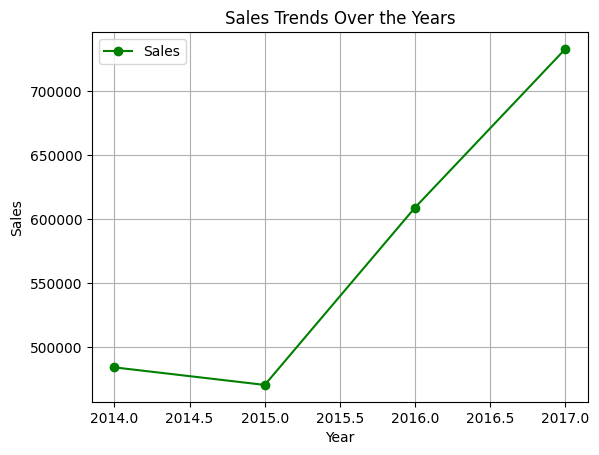

In [38]:
# create a new column extracting year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

df_sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Create an interactive line chart to show sales trends over the years
plt.plot(df_sales_by_year['Year'], df_sales_by_year['Sales'], color='green', marker='o', label='Sales')
plt.title('Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df_sales_by_year

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


After 2015 we see that sales were growing from 470532.509 to 733215.2552 ($)

# 2.2 Build an interactive map to visualize sales distribution by country.

In [39]:
# Group sales by cities
df_sales_by_city_year = df.groupby(['City', 'Year'])['Sales'].sum().reset_index()

In [40]:
# Initialize geolocator
geolocator = Nominatim(user_agent="sales_map", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Get Coordinates for each city
def get_coordinates(city):
    try:
        location = geocode(city + ", USA")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error retrieving coordinates for {city}: {e}")
        return None, None

# Apply function to get coordinates
df_sales_by_city_year['Coordinates'] = df_sales_by_city_year['City'].apply(get_coordinates)
df_sales_by_city_year[['Latitude', 'Longitude']] = pd.DataFrame(df_sales_by_city_year['Coordinates'].tolist(), index=df_sales_by_city_year.index)

# Drop rows with missing coordinates
df_sales_map = df_sales_by_city_year.dropna(subset=['Latitude', 'Longitude'])

# Create Interactive Map with Year Scrolling
fig = px.scatter_geo(df_sales_map,
                     lat='Latitude',
                     lon='Longitude',
                     size='Sales',
                     hover_name='City',
                     hover_data={'Sales': True, 'Latitude': False, 'Longitude': False},
                     animation_frame='Year',
                     projection="natural earth",
                     title="Sales Distribution by City and Year")

fig.update_layout(geo=dict(showland=True, landcolor="lightgray",
                           showcountries=True, countrycolor="gray"),
                  title_x=0.5)

fig.show()

# 3.1 Use Seaborn to generate a bar chart showing top 10 products by sales

<ipython-input-42-f13e79640498>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




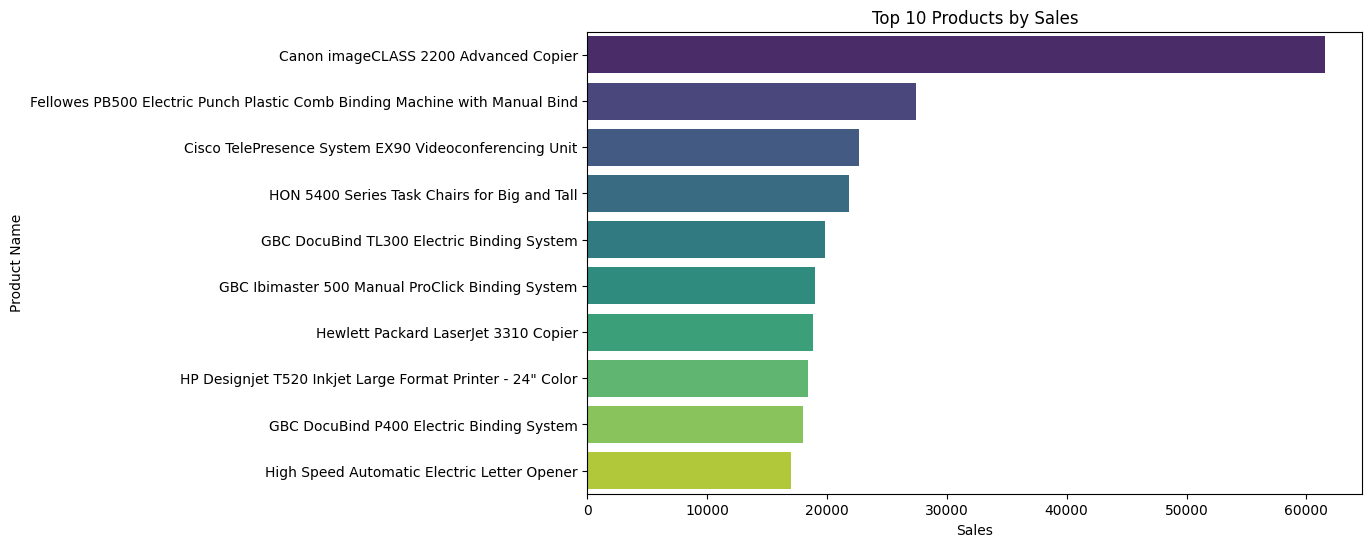

In [42]:
products_by_sales = df.groupby('Product Name')['Sales'].sum().reset_index()
top_10_products = products_by_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Product Name', data=top_10_products, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

# 3.2 Create a scatter plot to analyze the relationship between profit and discount

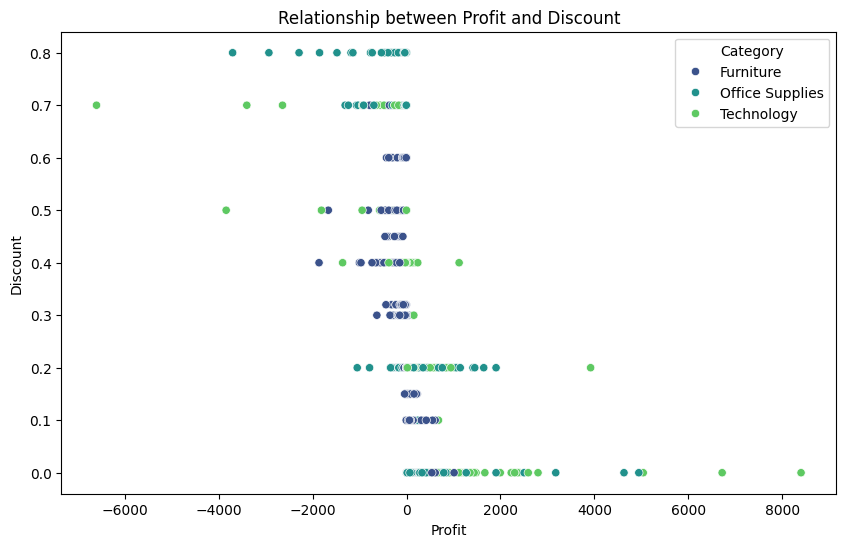

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='Discount', data=df, hue='Category', palette='viridis')
plt.title('Relationship between Profit and Discount')
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.legend(title='Category')

# 4.1 Compare the insights gained from Matplotlib and Seaborn visualizations

Choose Matplotlib if you need full control, detailed customizations, or publication-quality graphics.

Choose Seaborn if you're exploring data, performing statistical analysis, or need quick, attractive visuals.
